In [6]:
#Allows relative imports
import os
import sys
import pandas as pd 

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
#imports 
from src.preprocessing import *
from src.models import *
from src.train_eval_helpers import *
from src.plots import *
import torch
import torch.nn as nn
import torch.nn.functional as F
%load_ext autoreload
%autoreload 2
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi']= 300
import seaborn as sns
sns.set_style('darkgrid')

#checking gpu status
if torch.cuda.is_available():
    device = torch.device('cuda')
    print("Using : {}".format(device))
else:
    device = torch.device('cpu')
    print("Using : {}".format(device))

RANGE = range(12,17)
TRAINDIR = '../TrainingData/'

def get_df(path, type_, mod, ds):
    df = pd.read_csv(path, sep='\t', header=None)
    df.columns = ['name','cancer_score']
    df['type'] = type_
    df['model'] = mod  
    df['data'] = ds
    return df

import seaborn as sns
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
sns.set_style('darkgrid')
from src.plots import boxplot_cs

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Using : cuda


In [19]:
l1 = [os.path.join('../DEEPCAT_predictions/',x) for x in os.listdir('../DEEPCAT_predictions/')]
l2 = [os.path.join('../output/predicted_scores/ostmeyer_breast',x) for x in os.listdir('../output/predicted_scores/ostmeyer_breast')]

Here PVAL
LDAKFSODFSAD True
Here PVAL


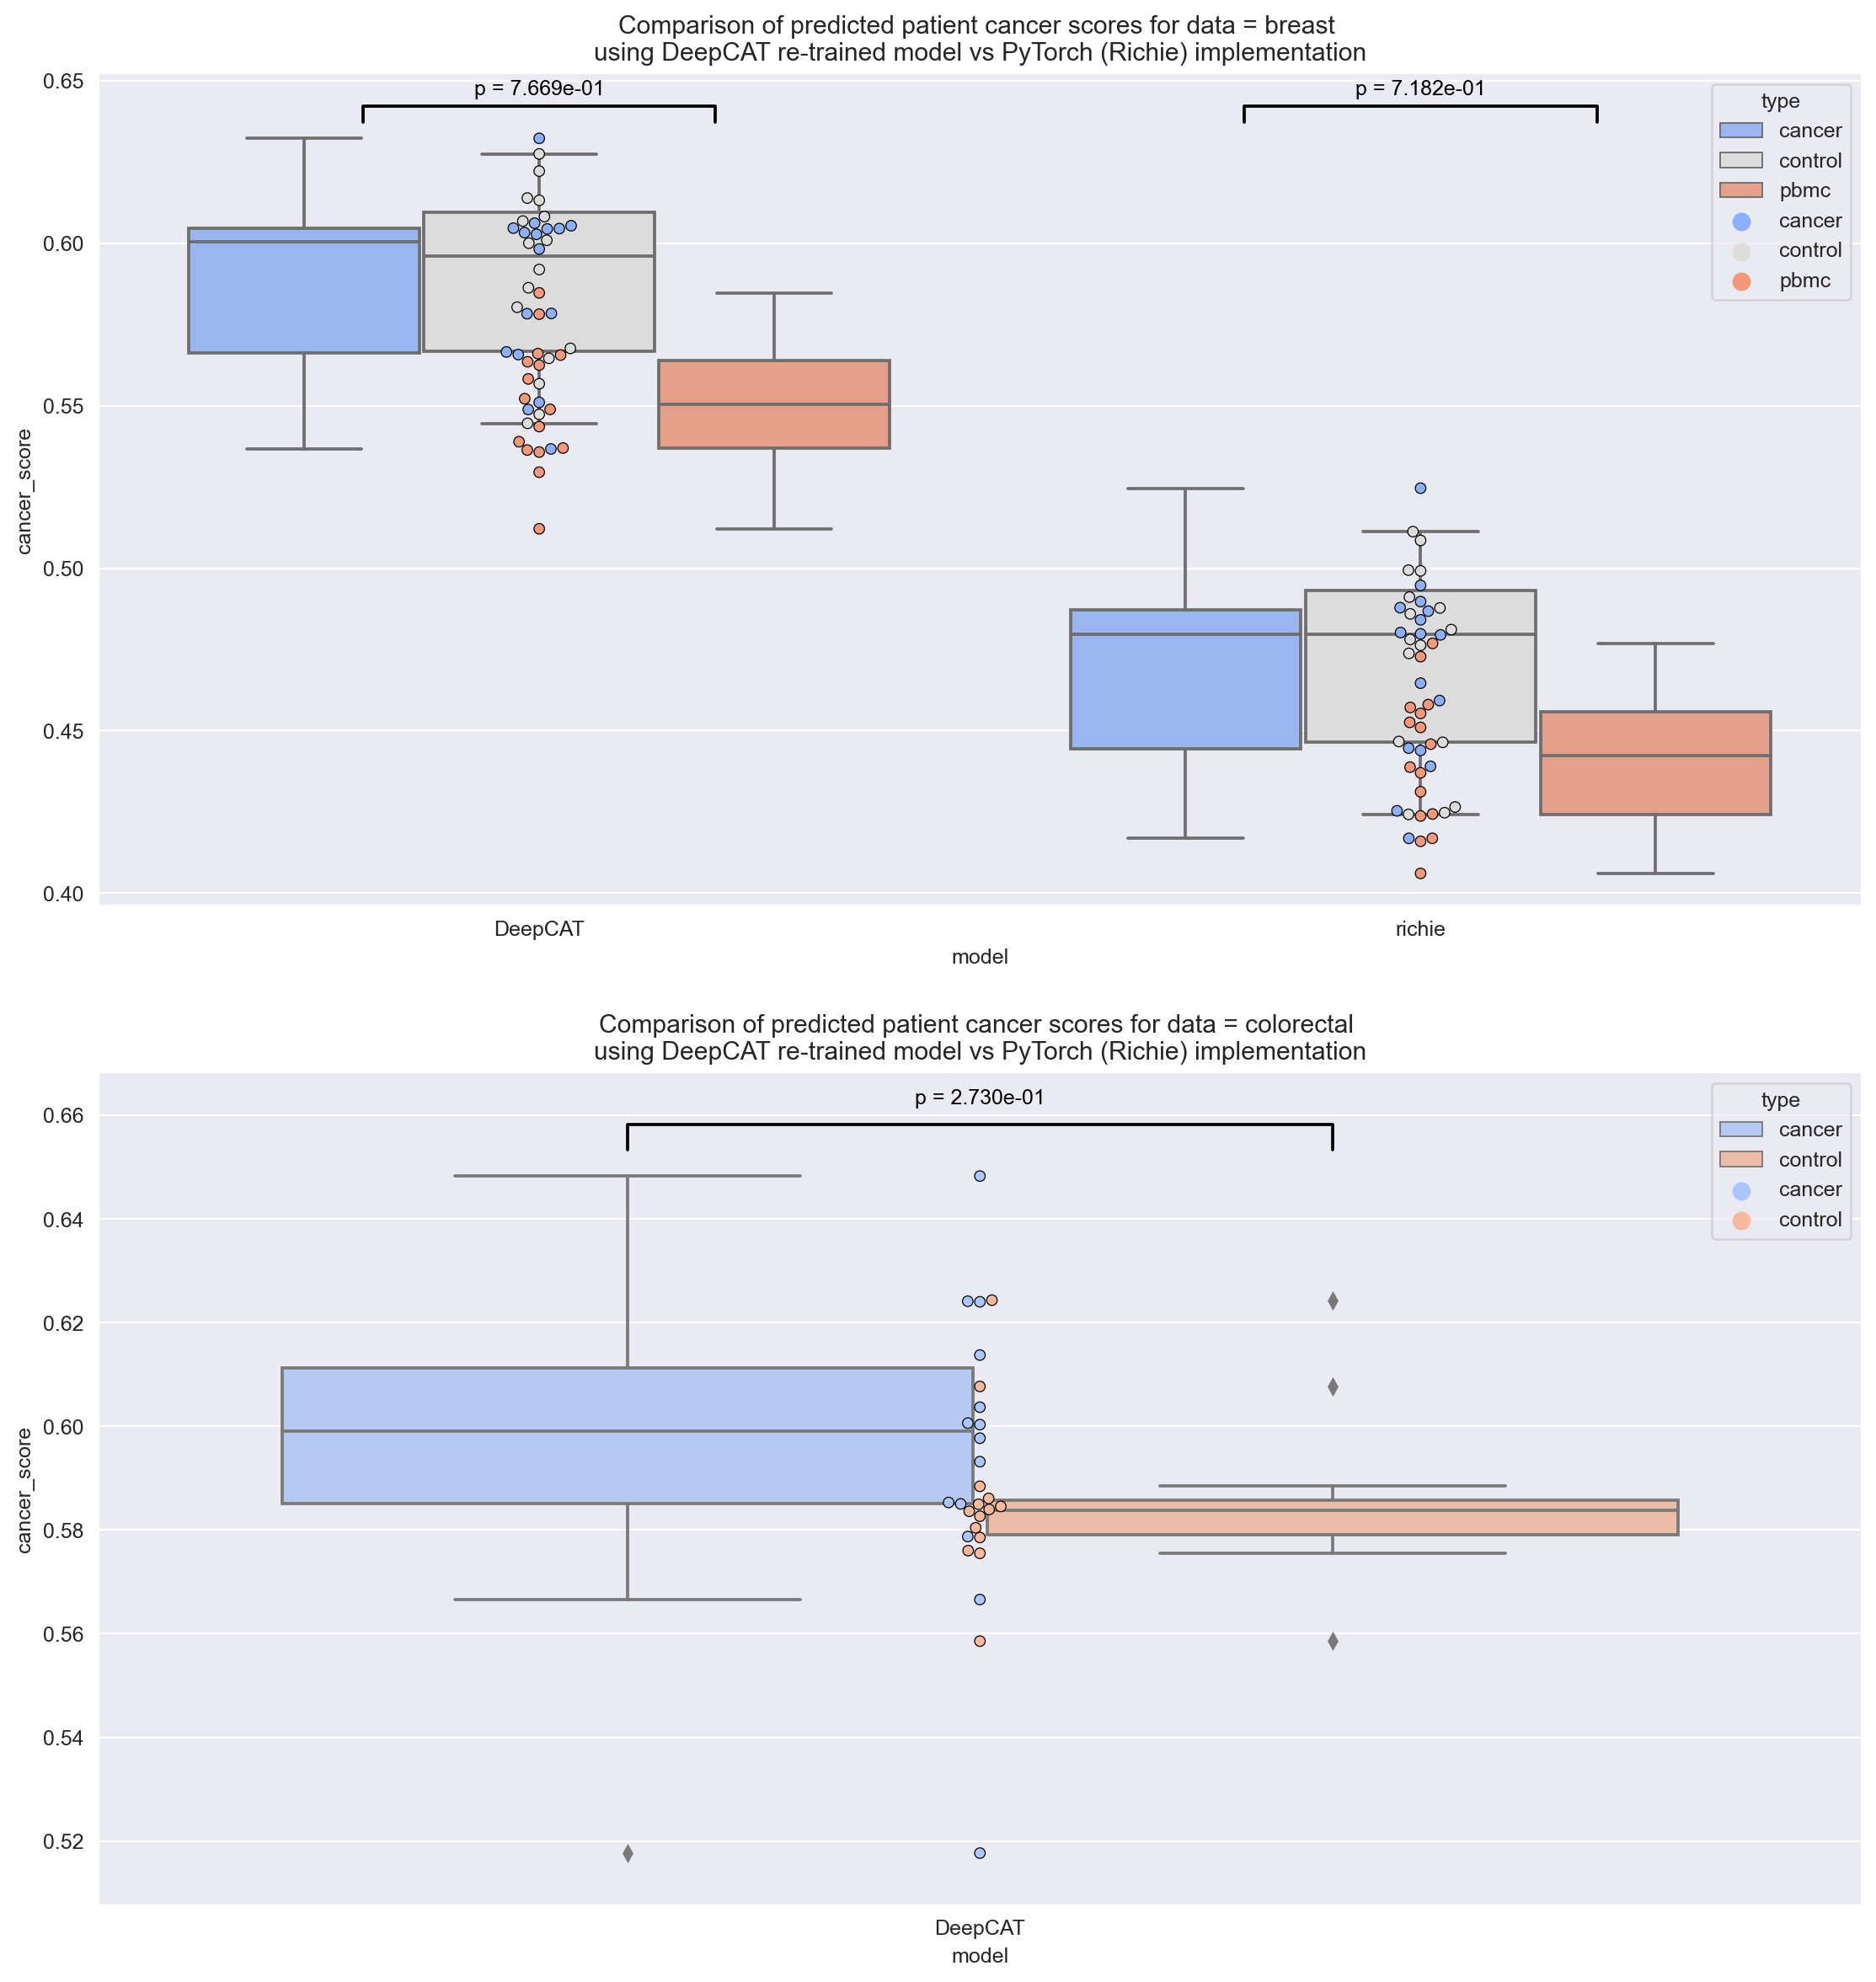

In [36]:
mod = 'DeepCAT'
br_ca = get_df(l1[0], 'cancer', mod, 'breast')
br_con = get_df(l1[1],'control',mod,'breast')
br_pbmc = get_df(l1[2],'pbmc',mod,'breast')

rich_br_ca = get_df(l2[0], 'cancer', 'richie', 'breast')
rich_br_con = get_df(l2[1],'control','richie','breast')
rich_br_pbmc = get_df(l2[2],'pbmc','richie','breast')

colo_ca = get_df(l1[-2], 'cancer',mod,'colorectal')
colo_con = get_df(l1[-1], 'control',mod,'colorectal')
total = pd.concat([br_ca,
                   br_con,
                   br_pbmc, 
                   rich_br_ca,
                   rich_br_con,
                   rich_br_pbmc,
                   colo_ca, 
                   colo_con], ignore_index=True)
boxplot_cs(total,True)